## Predicting Early Stage Diabetes Risk In Individuals using Machine Learning

#### Datasource
+ https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#
+ https://archive.ics.uci.edu/ml/machine-learning-databases/00529/

### Project Outline
+ Problem
+ Motivation
+ Dataset Information
+ Feature Processing and Feature Engineering
+ Machiine Learning Model Development
+ Prediction/Result
+ Evaluating the result/metrics
+ Conclusion
+ References

### Problem Statement
+ Diabetes is a very common disease with many risk factors that can lead to getting diabetes.
+ Is it possible to predict whether a patient/individual is at a risk of early stage diabetes given the signs and symptoms.
+ Since we are using an already labelled dataset to build a predictive model our task will be a supervised machine learning problem
+ Therefore we will be using a supervised machine learning classification approach to solve our problem.
+ Based on the number of target class we have will will need to build a binary classifier type of ML model.


#### About Dataset
+ Datasource:
    - https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#
+ Description:
    - The dataset was collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.
    
+ Metadata:
    - The dataset is a multivariate dataset in a CSV format.
    - It has 520 datapoints and 17 fields or attributes.
    
+ Attribute Information:
    - Age 1.20-65
    - Sex 1. Male, 2.Female
    - Polyuria 1.Yes, 2.No.
    - Polydipsia 1.Yes, 2.No.
    - sudden weight loss 1.Yes, 2.No.
    - weakness 1.Yes, 2.No.
    - Polyphagia 1.Yes, 2.No.
    - Genital thrush 1.Yes, 2.No.
    - visual blurring 1.Yes, 2.No.
    - Itching 1.Yes, 2.No.
    - Irritability 1.Yes, 2.No.
    - delayed healing 1.Yes, 2.No.
    - partial paresis 1.Yes, 2.No.
    - muscle stiness 1.Yes, 2.No.
    - Alopecia 1.Yes, 2.No.
    - Obesity 1.Yes, 2.No.
    - Class 1.Positive, 2.Negative.

In [1]:
# Load EDA Packages
import pandas as pd 
import numpy as np

In [2]:
# Load Data Viz Packages
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load Machine Learning Packages
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
# Versions
print("Pandas",pd.__version__)
print("Numpy",np.__version__)
print("Seaborn",sns.__version__)
print("Sklearn",sklearn.__version__)

Pandas 1.0.5
Numpy 1.18.5
Seaborn 0.10.1
Sklearn 0.23.1


### Descriptive Analysis of Dataset

In [6]:
# Read in Dataset
df = pd.read_csv("data/diabetes_data_upload.csv")

In [7]:
# Preview the First Rows
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
# Check for the shape of the dataset
df.shape

(520, 17)

In [9]:
# Check for columns names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
# Check Datatypes
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [11]:
# Check how many missing values we have
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

#### Narrative
+ There are no missing values and we have 520 datapoints and 17 Columns
+ Most of the columns/fields are of the Object type we will need to convert them to a proper format

#### Data Cleaning
+ Convert the column names to a better case and format
+ Encode the dataset into numeric format using either LabelEncoder or Custom Function
    - Gender : Female(0),Male(1)
    - all : No(0),Yes(1)

In [12]:
# Converting the columns
df.columns.str.lower().str.replace(' ','_')

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [15]:
# Encode the dataset
from sklearn.preprocessing import LabelEncoder

In [16]:
objList = df.select_dtypes(include='object').columns

In [17]:
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [18]:
columns_to_label_encode = [ 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [19]:
LE = LabelEncoder()

In [20]:
# Encode Every column except age,gender and class
for col in columns_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))

In [21]:
df.dtypes

age                    int64
gender                object
polyuria               int32
polydipsia             int32
sudden_weight_loss     int32
weakness               int32
polyphagia             int32
genital_thrush         int32
visual_blurring        int32
itching                int32
irritability           int32
delayed_healing        int32
partial_paresis        int32
muscle_stiffness       int32
alopecia               int32
obesity                int32
class                 object
dtype: object

In [22]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [23]:
# List Initial Classes
print(LE.classes_)

['No' 'Yes']


In [24]:
# Method 2 Using Custom Function for encoding gender and class columns
gender_map = {"Female":0,"Male":1}
target_label_map = {"Negative":0,"Positive":1}

In [25]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['gender'] = df['gender'].map(gender_map)

In [27]:
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [28]:
# For Target Label
# Get Unique Values
df['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [29]:
# Encode the target class using a mapping dictionary
df['class'] = df['class'].map(target_label_map)

In [30]:
# Recheck Datatypes
df.dtypes

age                   int64
gender                int64
polyuria              int32
polydipsia            int32
sudden_weight_loss    int32
weakness              int32
polyphagia            int32
genital_thrush        int32
visual_blurring       int32
itching               int32
irritability          int32
delayed_healing       int32
partial_paresis       int32
muscle_stiffness      int32
alopecia              int32
obesity               int32
class                 int64
dtype: object

In [31]:
# Recheck using Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int32
 3   polydipsia          520 non-null    int32
 4   sudden_weight_loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   polyphagia          520 non-null    int32
 7   genital_thrush      520 non-null    int32
 8   visual_blurring     520 non-null    int32
 9   itching             520 non-null    int32
 10  irritability        520 non-null    int32
 11  delayed_healing     520 non-null    int32
 12  partial_paresis     520 non-null    int32
 13  muscle_stiffness    520 non-null    int32
 14  alopecia            520 non-null    int32
 15  obesity             520 non-null    int32
 16  class               520 non-null    int64
dt

In [32]:
# Descriptive Summary
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Narrative
+ From the descriptive summary, the minimum age is 16 and the maximum age is 90
+ We will have to get the distribution of data per the age


In [33]:
# Value Count Per Class
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

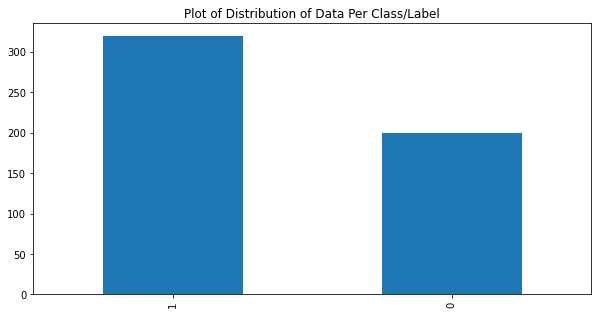

In [34]:
# Plot of Distribution of Data Per Class/Label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class/Label")
df['class'].value_counts().plot(kind='bar')
plt.show()

#### Narrative
+ Our dataset has 
    - 320 datapoints for class 1( Positive)
    - 200 datapoints for class 0( Negative)
+ This looks like a balanced dataset from the plot of the value counts

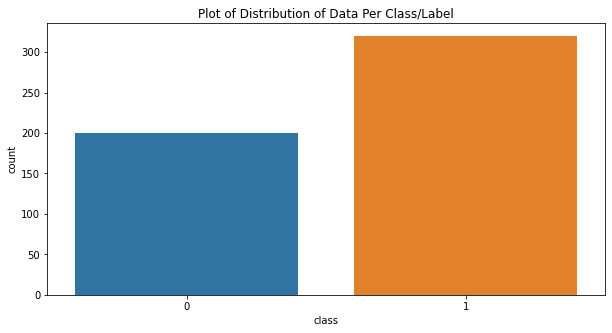

In [37]:
# Plot of Distribution of Data Per Class/Label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class/Label")
sns.countplot(df['class'])
plt.show()

In [38]:
# Value Count Of Gender
df['gender'].value_counts()

1    328
0    192
Name: gender, dtype: int64

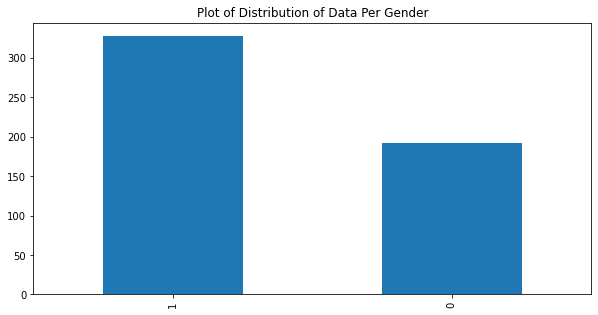

In [39]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Gender")
df['gender'].value_counts().plot(kind='bar')
plt.show()

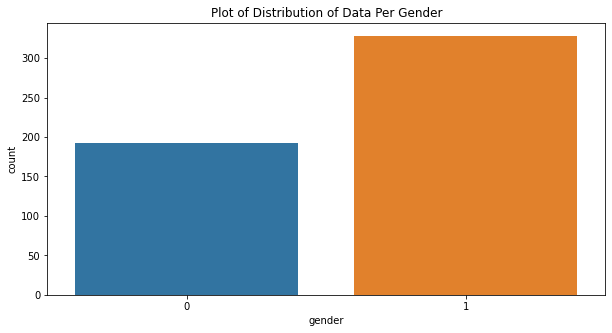

In [40]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Gender")
sns.countplot(df['gender'])
plt.show()

#### Narrative
+ Our dataset has 
    - 328 datapoints for class 1(Males)
    - 192 datapoints for class 0(Females)
+ There are more males than females

#### Frequency Distribution Table using the Age Range¶

In [41]:
#### Find the minimum and max age
print("Max",df['age'].max())
print("Min",df['age'].min())

Max 90
Min 16


In [43]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80 and more"]
bins= [0,10,20,30,40,50,60,70,80,90]

In [44]:
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [45]:
freq_df.head()

age
Less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [46]:
freq_df = freq_df.reset_index(name='count')

In [47]:
freq_df.head()

,age,count
0,Less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


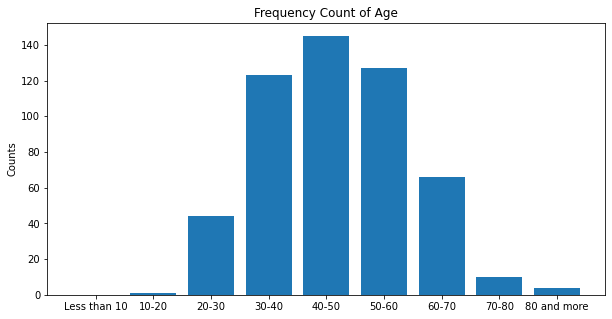

In [48]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

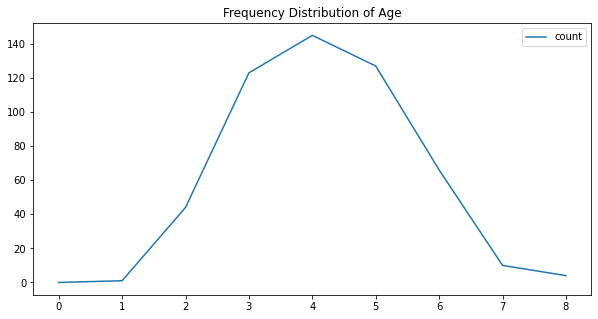

In [49]:
# Plot of Distribution of Data Per Gender
freq_df.plot(kind='line',figsize=(10,5))
plt.title("Frequency Distribution of Age")
plt.show()

#### Narrative
+ Highest prevalence of Diabetes is from 40-50 followed by 50-60 and 30-40
+ The least is individual under 20, and elderly above 80

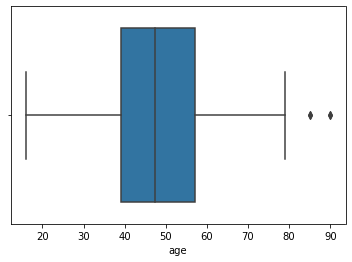

In [50]:
# Find Outliers in Age using BoxPlot
sns.boxplot(df['age'])

#### Correlation Analysis of Features in Relation to Target Class ( Early Stage Risk)
+ We will like to explore the dataset to see if there is an association between the features and the target label class

In [51]:
# Method 1 
df.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


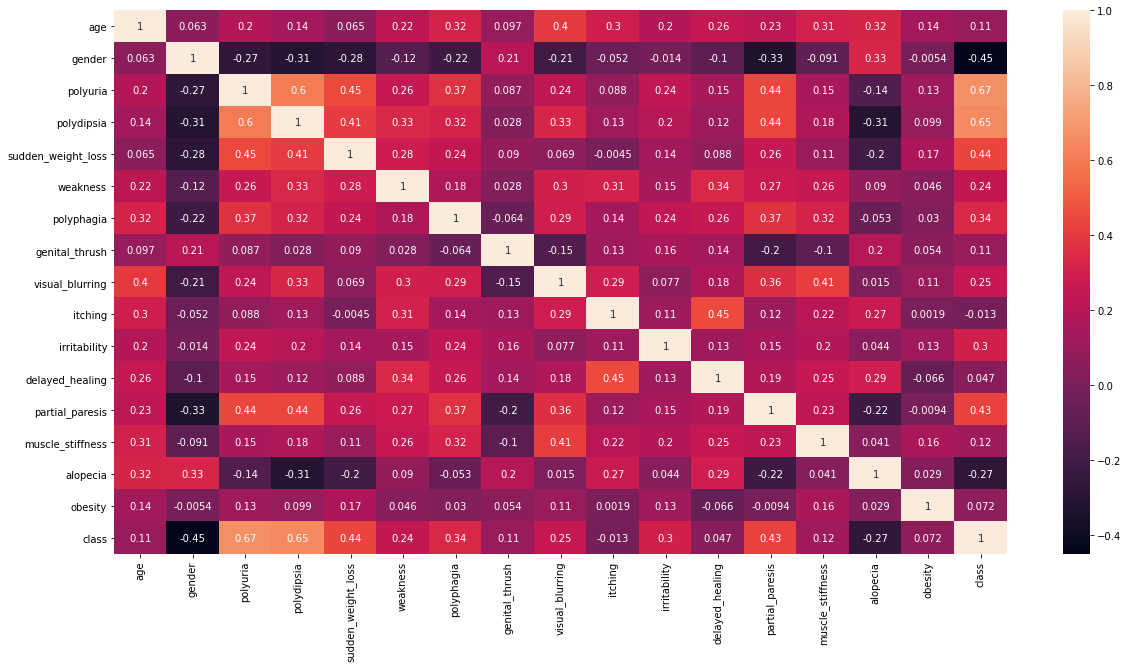

In [52]:
# Plot Correlation with Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [53]:
corr_matrix = df.corr()

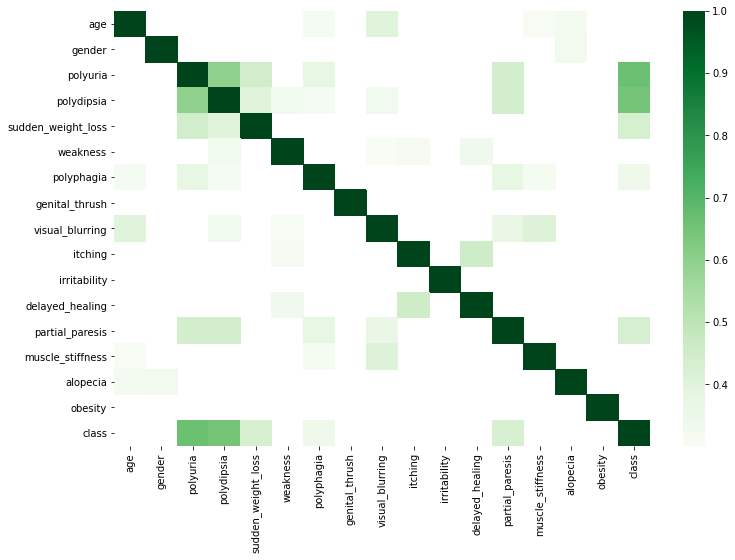

In [54]:
highest_corr = corr_matrix[corr_matrix>=.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap="Greens")

In [55]:
# List Features with the highest Correlation Coefficient
s = corr_matrix.abs().unstack()
top_features_per_correlation = s.sort_values(kind="quicksort")

In [56]:
print(top_features_per_correlation)

obesity             itching               0.001894
itching             obesity               0.001894
                    sudden_weight_loss    0.004516
sudden_weight_loss  itching               0.004516
obesity             gender                0.005396
                                            ...   
polydipsia          polydipsia            1.000000
polyuria            polyuria              1.000000
gender              gender                1.000000
obesity             obesity               1.000000
class               class                 1.000000
Length: 289, dtype: float64


#### Feature Engineering and Selection
+ A feature is an attribute or property shared by all of the independent units on which analysis or prediction is to be done.
+ Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. 
+ We will be using feature selection  techniques to find the most informative features for our model.

In [57]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [59]:
# Features and Labels
# Which columns are for features and for labels
X = df[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]
       
y = df['class']

In [60]:
# Find the best features using Selectkbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)

In [61]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [62]:
feature_column_names = pd.DataFrame(X.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [64]:
# List Features
best_feat_df

,Feature_Scores,Feature_name
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [65]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [66]:
# List Columns/Features we will be using
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['polydipsia', 'polyuria', 'sudden_weight_loss', 'partial_paresis',
       'gender', 'irritability', 'polyphagia', 'alopecia', 'age',
       'visual_blurring', 'weakness', 'genital_thrush'], dtype=object)

#### Narrative
+ From our analysis,polydipsia,polyuria,sudden weight loss and partial paresis plays an important role in making our prediction
+ This confirms an already established fact for signs of diabetes ie, polydipsia,polyuria and polyphagia.


#### Which of these features are important  using ExtraTreesClassifier

In [67]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [68]:
# Print Important
print(et_clf.feature_importances_)

[0.04977128 0.10342785 0.22885708 0.19258004 0.05590596 0.01972534
 0.0368544  0.02526844 0.03585957 0.03332956 0.04541946 0.0414068
 0.04879978 0.02364229 0.03888031 0.02027184]


In [69]:
# Convert to a Dataframe
feature_importance_df = pd.Series(et_clf.feature_importances_,index=X.columns)

In [70]:
feature_importance_df.head()

age                   0.049771
gender                0.103428
polyuria              0.228857
polydipsia            0.192580
sudden_weight_loss    0.055906
dtype: float64

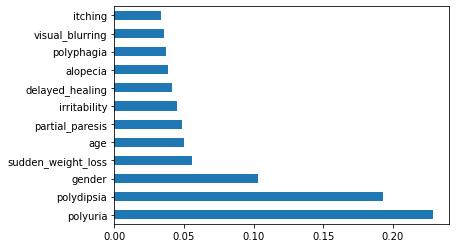

In [71]:
feature_importance_df.nlargest(12).plot(kind='barh')

#### Narrative
+ Using ExtraTreeClassifier Algorithm we found out similar result with the SelectKBest
+ Polyuria,polydipsia,gender and sudden weight loss,age and partial paresis are the most important.
+ Almost like the previous except that the order of gender and sudden weight loss was changed
+ However since this is a health issue we will be using all the features as there can be diverse scenario due to 
different life style and physiology of individuals

### Machine Learning Model Development
+ We will be building a supervised machine learning classification model using several algorithms namely
    - LogisticRegression: useful for classification problems and it is  simple and fast, but it will not work well if you problem is "complex.""
    - KNN: 
    - Decision Tree Classifier

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Features and Labels
print(X.columns)


Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [74]:
# Split Dataset into 2
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=7)


In [75]:
# Shape of Dataset
print("original data",df.shape)
print("training data",x_train.shape)
print("testing data",y_test.shape)

original data (520, 17)
training data (364, 16)
testing data (156,)


In [76]:
# Using LogisticRegression Estimator to Build A Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [77]:
# Check Model Accuracy
# Method 1
lr_model.score(x_test,y_test)

0.8910256410256411

In [78]:
# Check Model Accuracy
y_pred = lr_model.predict(x_test)

In [79]:
# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of LR Model:{}".format(accuracy_score(y_test,y_pred)))

Accuracy of LR Model:0.8910256410256411


#### Narrative
+ Using the LogisticRegression ML Estimator our model had an accuracy score of 0.891 (89%)
+ We will have to evaluate our model with other metrics such as classification report (since this is a classification problem) and confusion matrix

### Evaluation of Model
+ Using Classification Report
    -  This function creates a text report showing the main classification metrics such as precision,recall,f1-score
    -  Precision: refers to the ability of the classifier not to label as positive a sample that is negative, 
    -  Recall: refers to the ability of the classifier to find all the positive samples.
+ Using Confusion Matrix
+ ROC Curve
+ Precision Recall Curve

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [81]:
target_names= ["Negative(0)","Positive(1)"]

In [82]:
# Classification Report
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.81      0.95      0.88        63
 Positive(1)       0.96      0.85      0.90        93

    accuracy                           0.89       156
   macro avg       0.89      0.90      0.89       156
weighted avg       0.90      0.89      0.89       156



#### Info on Classification Report
+ "macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

+ "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

+ "micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

+ "samples" applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.


In [83]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[60,  3],
       [14, 79]], dtype=int64)

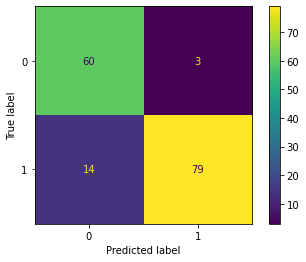

In [84]:
# Plot Confusion Matrix
plot_confusion_matrix(lr_model,x_test,y_test)

#### RoC Curve
+ Receiver operating characteristic (ROC) curve is another common tool used with binary
classifiers.
+ It is similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
curve plots the true positive rate (another name for recall) against the false positive rate.
+ A perfect classifier
will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to
0.5 So in our case we had an almost perfect classifier with an AUC of 0.96

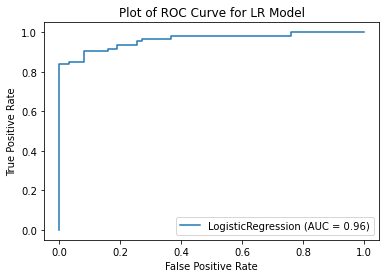

In [85]:
# ROC Curve
plot_roc_curve(lr_model, x_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

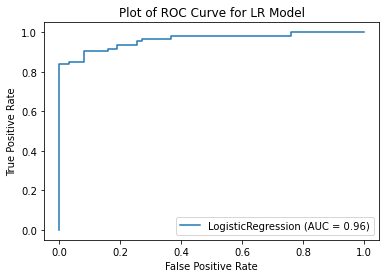

In [86]:
# ROC Curve
plot_roc_curve(lr_model, x_test, y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

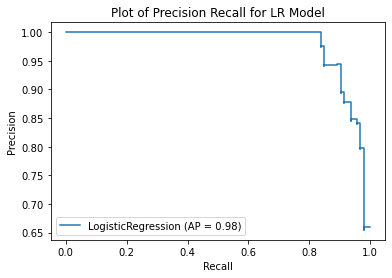

In [87]:
plot_precision_recall_curve(lr_model, x_test, y_test)
plt.title("Plot of Precision Recall for LR Model")
plt.show()

In [89]:
# Uncommented for pdf conversion
# Method 3
from yellowbrick.classifier import PrecisionRecallCurve,ROCAUC

0.9784589894784246

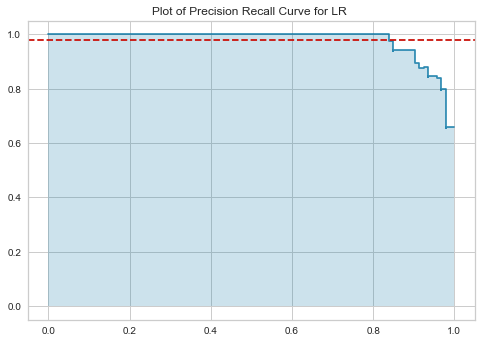

In [90]:
# Plot of PrecisionRecall : usually used for imbalanced dataset
viz = PrecisionRecallCurve(LogisticRegression())
plt.title("Plot of Precision Recall Curve for LR ")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [91]:
# Save Plot
viz.show(outpath='precision_recall_curve_lr.png')

<Figure size 576x396 with 0 Axes>

0.9646194007722177

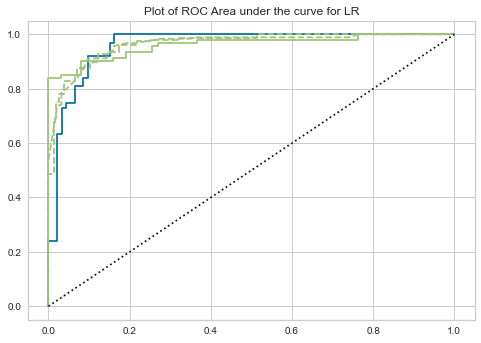

In [106]:
viz = ROCAUC(LogisticRegression())
plt.title("Plot of ROC Area under the curve for LR")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
# viz.show(outpath='rocauc_curve_lr.png')

#### Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
def cross_validate_model(model_estimator,X,y,cv):
    """Evaluate Model using cross validation of KFolds"""
    scores = cross_val_score(model_estimator, X, y, scoring='accuracy', cv=cv)
    # report performance
    result = "Mean Accuracy: {}  Standard_Deviation : {}".format(np.mean(scores), np.std(scores))
    return result

In [96]:
# Cross Validaion For LR
cv_scores_for_lr_model = cross_validate_model(LogisticRegression(),X,y,5)

In [97]:
print(cv_scores_for_lr_model)

Mean Accuracy: 0.926923076923077  Standard_Deviation : 0.036284542815602304


#### Narrative
+ We can improve our model accuracy via hyperparameter tuning to get a higher accuracy and performance

#### Using Decision Tree Classifier Model

In [98]:
dt_model = DecisionTreeClassifier()

In [99]:
# Fit
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
# Check Model Accuracy
y_pred2 = dt_model.predict(x_test)
# Using Accuracy Score to check for accuracy by comparing with the predicted values and the test values
print("Accuracy of Decision Tree Model:{}".format(accuracy_score(y_test,y_pred2)))

Accuracy of Decision Tree Model:0.9807692307692307


#### Narrative
+ Comparing our two models (Logistic Regression and Decision Tree) the Decision Tree Clf had a higher accuracy score of 0.98 
whilst the Logistic Regression model is 0.89
+ We will have to evaluate them

In [101]:
# Classification Report For Decision Tree Model
print(classification_report(y_test,y_pred2,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      0.97      0.98        63
 Positive(1)       0.98      0.99      0.98        93

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



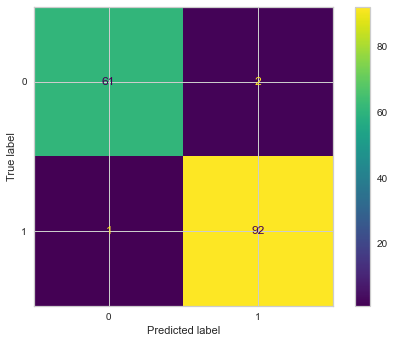

In [102]:
# Plot Confusion Matrix
plot_confusion_matrix(dt_model,x_test,y_test)

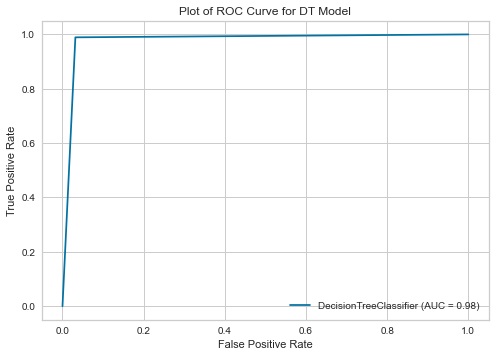

In [103]:
# ROC Curve
plot_roc_curve(dt_model, x_test, y_test)
plt.title("Plot of ROC Curve for DT Model")
plt.show()

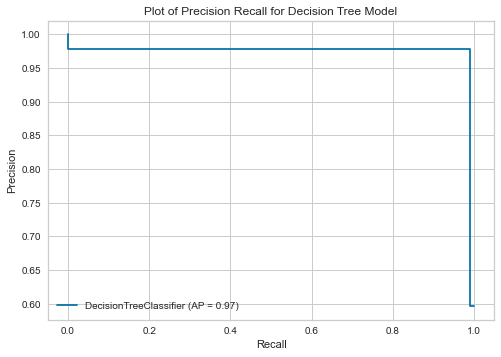

In [104]:
plot_precision_recall_curve(dt_model, x_test, y_test)
plt.title("Plot of Precision Recall for Decision Tree Model")
plt.show()

0.9787506400409626

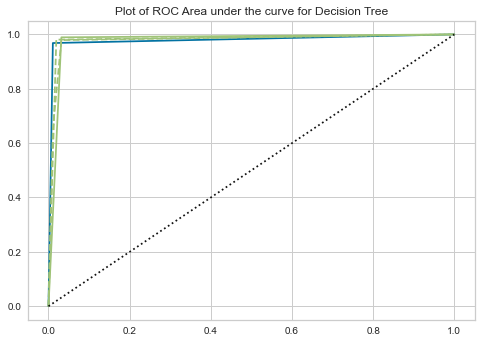

In [105]:
# Plot of ROC Curve
viz = ROCAUC(DecisionTreeClassifier())
plt.title("Plot of ROC Area under the curve for Decision Tree")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
# viz.show(outpath='precision_recall_curve_dt.png')

0.9746097530929376

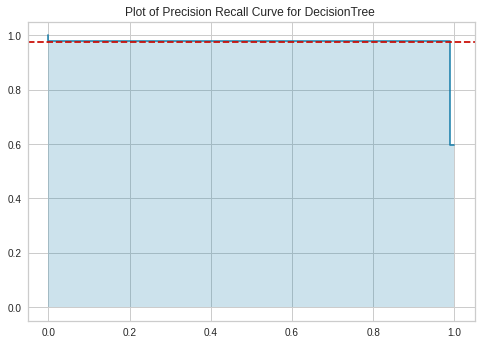

In [107]:
# Plot of PrecisionRecall : usually used for imbalanced dataset
viz = PrecisionRecallCurve(DecisionTreeClassifier())
plt.title("Plot of Precision Recall Curve for DecisionTree ")
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
# viz.show(outpath='precision_recall_curve_dt.png')

#### Using F1 Score to Compare Both Models
+ The F1 score is the harmonic mean of precision and recall.
+ The regular mean treats all values equally, while the harmonic mean gives much more weight to
low values.
+ Therefore, the classifier will only get a high F1 score if both recall and precision are high.
+ The F1 score favors classifiers that have similar precision and recall.
+ We pick the higher f1 score if we are working on an imbalanced dataset and we are interested in one important class.

In [107]:
# Compare model using F1 Score
from sklearn.metrics import f1_score
f1_for_lr_model = f1_score(y_test, y_pred, average='macro')
f1_for_dt_model = f1_score(y_test, y_pred2, average='macro')

In [108]:
print("LR F1-score",f1_for_lr_model)
print("DT F1-score",f1_for_dt_model)

LR F1-score 0.8893847758081335
DT F1-score 0.9799786096256684


#### Narrative
+ The Decision Tree Classifier does better than the Logistic Regression Classifier
+ Let us explore how the Decision Tree Classifier works

In [111]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import graphviz

In [112]:
feature_names = X.columns

In [113]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dt_model,out_file=None,feature_names=feature_names,class_names=target_names)

In [113]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [119]:
# Draw a graph using graphviz
graph2 = graphviz.Source(dot_data)

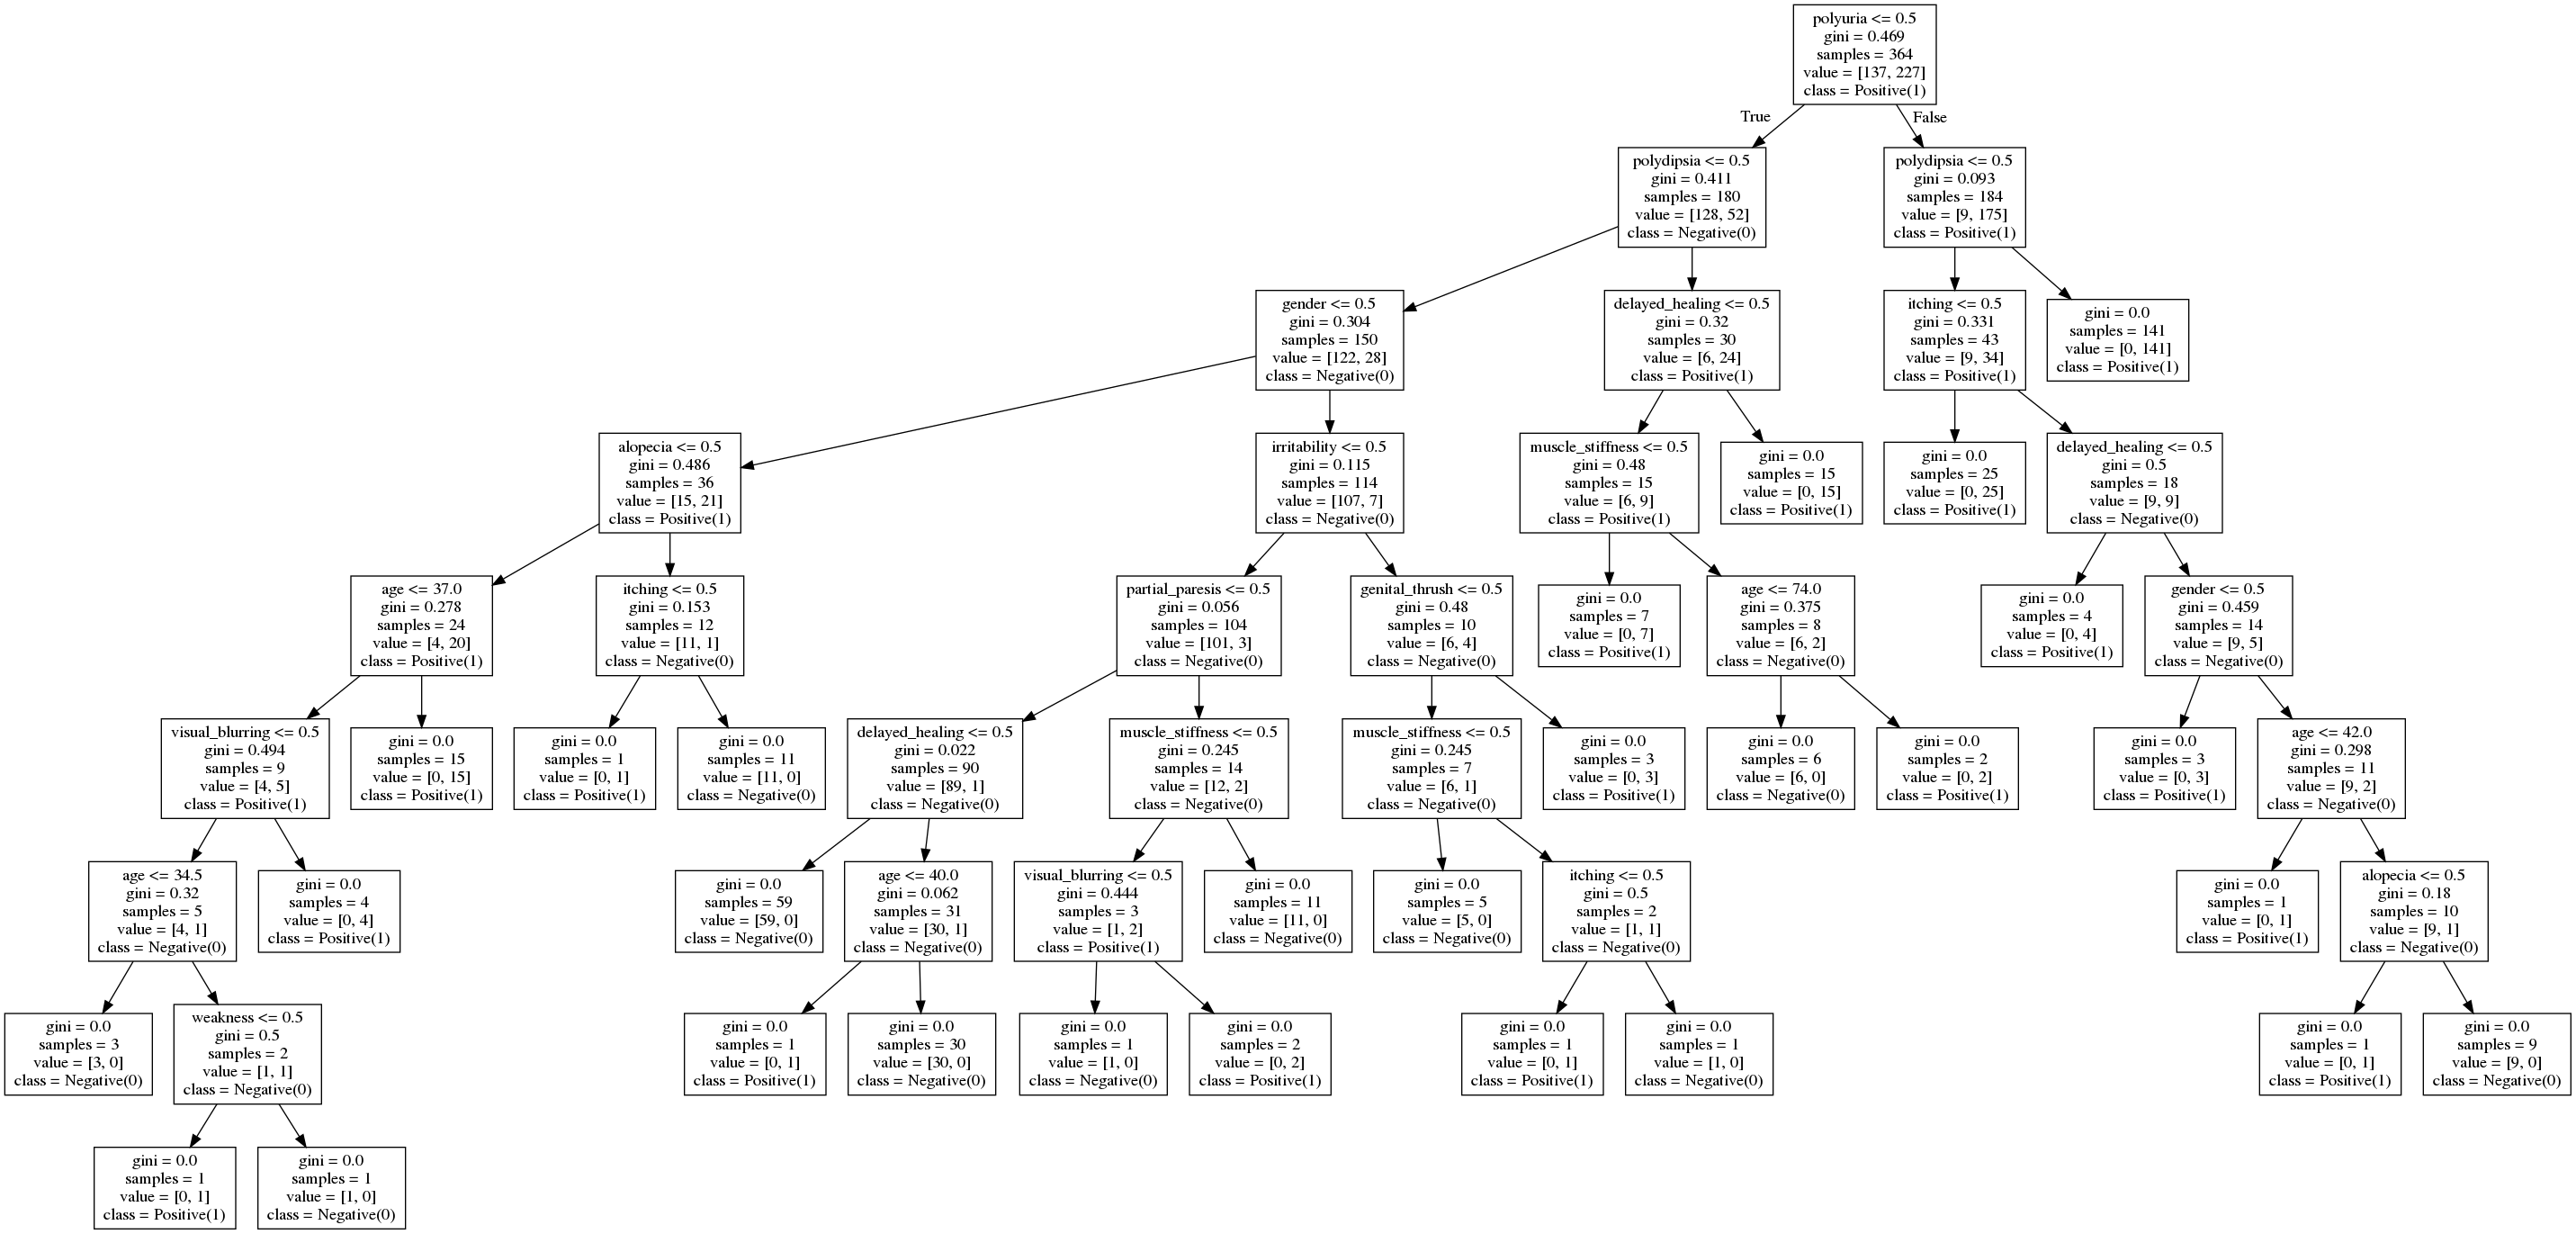

In [114]:
Image(graph.create_png())

In [116]:
# Save the plot
graph.write_png("early_stage_diabetes_decision_tree_plot.png")

True

In [120]:
# Cross Validaion For Decision Tree
cv_scores_for_dt_model = cross_validate_model(DecisionTreeClassifier(),X,y,5)

In [121]:
print(cv_scores_for_dt_model)

Mean Accuracy: 0.9596153846153846  Standard_Deviation : 0.031246301556292176


#### Saving Model

In [122]:
# Using Joblib
import joblib

In [123]:
print("Joblib",joblib.__version__)

Joblib 0.16.0


In [124]:
# Save LR Model
model_file = open("logistic_regression_model_diabetes_21_oct_2020.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [125]:
# Save Decision Tree Model
model_file_dt = open("decision_tree_model_diabetes_21_oct_2020.pkl","wb")
joblib.dump(dt_model,model_file_dt)
model_file_dt.close()

#### Model Interpretation
+ We will be trying to see how our model makes a prediction or classification
+ This allows us to see into our 'black box' model to know how each feature contributes to make a prediction

In [127]:
# Load Model
import eli5

In [128]:
print("Features names",feature_names.tolist())
print("=======")
print("Class names",target_names)

Features names ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
Class names ['Negative(0)', 'Positive(1)']


In [129]:
# Show how each feature contributes
eli5.show_weights(lr_model,feature_names=feature_names.tolist(),target_names=target_names)

Weight?,Feature
+2.770,polydipsia
+2.573,polyuria
+1.280,irritability
+0.991,partial_paresis
+0.860,genital_thrush
+0.798,polyphagia
+0.575,visual_blurring
+0.571,sudden_weight_loss
+0.345,weakness
+0.060,<BIAS>


In [127]:
# Let us make a prediction and interpret it

In [131]:
x_test.iloc[7]

age                   45
gender                 1
polyuria               0
polydipsia             0
sudden_weight_loss     1
weakness               1
polyphagia             1
genital_thrush         1
visual_blurring        0
itching                1
irritability           0
delayed_healing        1
partial_paresis        0
muscle_stiffness       0
alopecia               0
obesity                0
Name: 3, dtype: int64

In [132]:
# Let us predict on X_test[7]
ex = np.array(x_test.iloc[7]).reshape(1,-1)

In [130]:
lr_model.predict(ex)

array([0])

In [133]:
# Check Prediction Probability
lr_model.predict_proba(ex)

array([[0.87024144, 0.12975856]])

#### Narrative
+ Our model predict our sample as Negative with a probability of 0.87 or 87% certainty

In [134]:
# Show how each feature contributes to our prediction
eli5.show_prediction(lr_model,x_test.iloc[7],feature_names=feature_names.tolist(),target_names=target_names)

#### Interpretation
+ The reason our model gave us Negative for our prediction is because the most important features of polydipsia,polyphagia and sudden
weight loss had low contribution values 

In [135]:
cv_scores_for_dt_model

'Mean Accuracy: 0.9596153846153846  Standard_Deviation : 0.031246301556292176'

In [136]:
cv_scores_for_lr_model

'Mean Accuracy: 0.926923076923077  Standard_Deviation : 0.036284542815602304'

#### Conclusion
Our task was to build an ML Model to predict early stage diabetes risk given the symptoms and signs of an individual.
In our analysis we found out that the following features had a greater importance and influence on our prediction than the others.
These features were also helpful in interpreting why our LogisticRegression Model made some classification.
These features include:

    -Polydipsia
    -Polyuria
    -Sudden Weight Loss
    - Age
    - Partial Paresis
    
Moreover  our models (LogisticRegression(0.89) and Decision Tree Models(0.98)) had a better model accuracy with the Decision Tree Classifier Model being the highest.
Using cross validation we found out that even the LR model can be improve to give us an accuracy of 0.92 with a standard deviation of 0.036 whilst that of the DC Model was 0.95 with a standard deviation of 0.029
With the looks of this the DC model does better than the LR model.

To conclude, we can use these ML models to predict Early Stage Risk Diabetes with a higher accuracy and metrics

### Reference
+ https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
+ Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques by M. M. Faniqul Islam,Rahatara Ferdousi et al
